##### Parse each hundred songs and pickle the results as to not run into resource issues

In [ ]:
# for i in range(0, len(midi_files), 100):
#     parsed = [converter.parse(f'midi_files/{file}') for file in midi_files[i:i + 100]]
#     with open(f'{pickle_path}/{i} - {i + 100}.pickle', 'wb') as f:
#         pickle.dump(parsed, f)

##### Create function to run a callback over all the music21 objects in all the pickle files and return the results

In [2]:
music21_object_pickles = [file for file in os.listdir(pickle_path)]

def apply_to_pickles(callback):
    output = []
    for filename in music21_object_pickles:
        with open(f'{pickle_path}/{filename}', 'rb') as f:
            chunk = pickle.load(f)
            output.append(callback(chunk))
    return output

##### Create function to get the instrument names for each music21 object

In [7]:
def get_instrument_names(scores):
    output = []
    for score in scores:
        instruments = instrument.partitionByInstrument(score)
        if instruments:
            output += [part.getInstrument().instrumentName for part in instruments.parts]
    return output

##### Pull out instrument names for all songs and pickle the results

In [9]:
# instrument_names = apply_to_pickles(get_instrument_names)
with open('pickles/all_instrument_names.pickle', 'rb') as f:
    global instrument_names
    instrument_names = pickle.load(f)

In [11]:
from collections import Counter
count = Counter(instrument_names)

In [43]:
count_df = pd.DataFrame(count.most_common(25), columns=['instrument', 'count'])
count_df

,instrument,count
0,Sampler,2253
1,Piano,2112
2,Electric Bass,1836
3,StringInstrument,1272
4,None,1211
5,Electric Guitar,936
6,Acoustic Bass,649
7,Acoustic Guitar,617
8,Bass,527
9,Electric Organ,484


In [55]:
count_df.loc[4, ['instrument']] = 'None'

<AxesSubplot:xlabel='instrument', ylabel='count'>

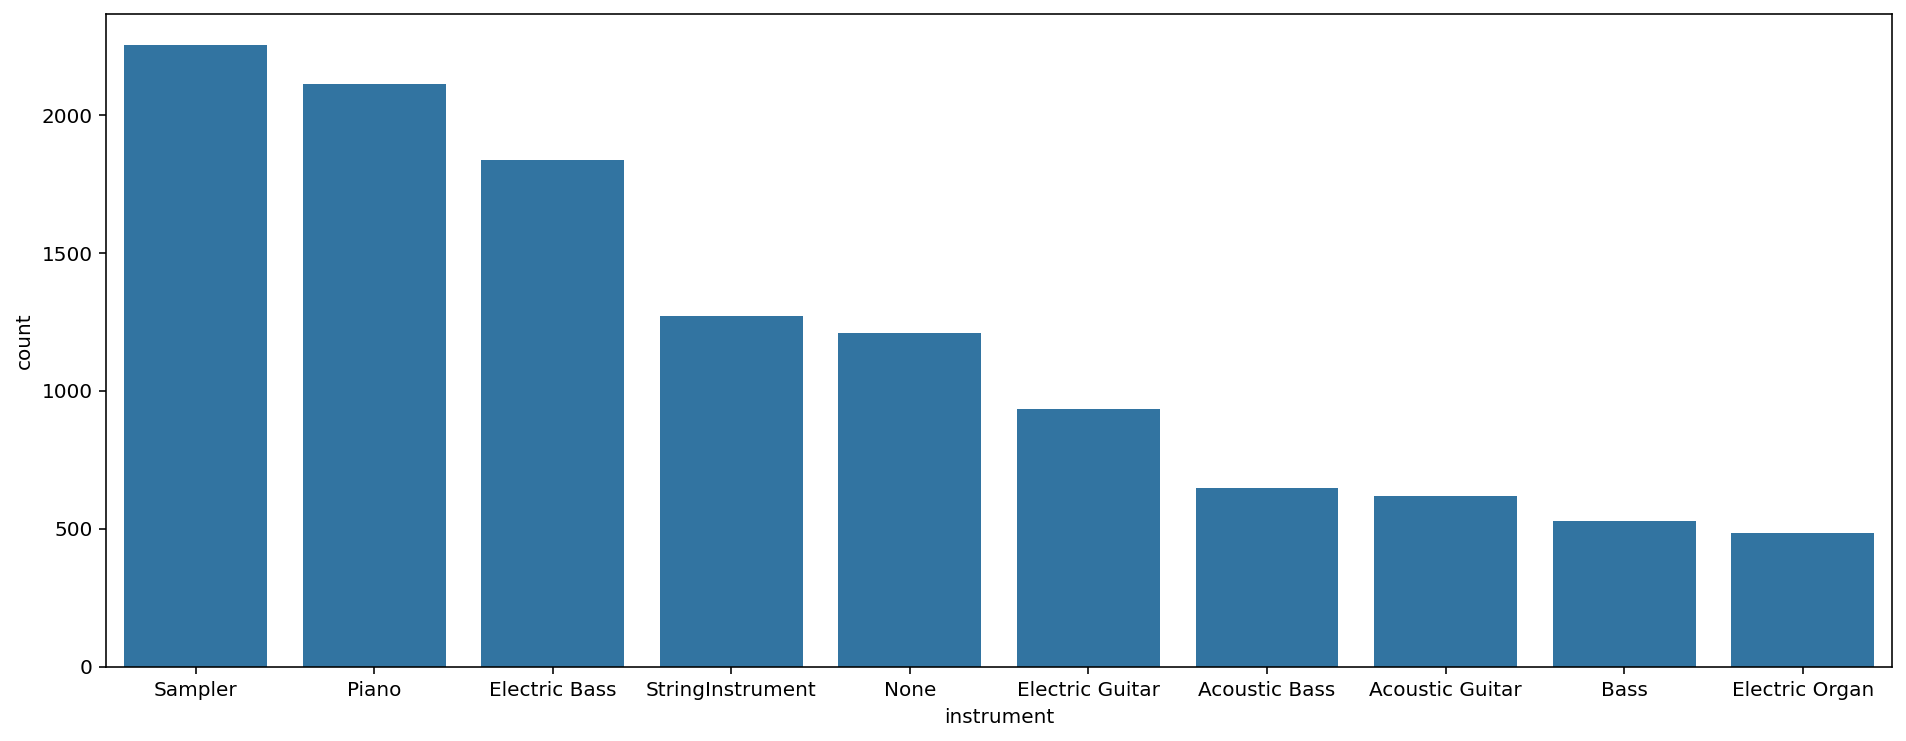

In [56]:
plt.figure(figsize=(16, 6))
sns.barplot(data=count_df[:10], x='instrument', y='count', color='tab:blue')

##### Easiest way to see the total length of the song

In [74]:
example.highestTime

171.5

##### Get all song lengths and inspect them

In [76]:
def get_song_lengths(scores):
    output = []
    for score in scores:
        output.append(score.highestTime)
    return output

In [144]:
# song_lengths = apply_to_pickles(get_song_lengths)
# flattened_lengths = [length for list in song_lengths for length in list]

# with open('pickles/all_song_lengths.pickle', 'wb') as f:
#     pickle.dump(flattened_lengths, f)

with open('pickles/all_song_lengths.pickle', 'rb') as f:
    global flattened_lengths
    flattened_lengths = pickle.load(f)

In [96]:
from fractions import Fraction

without_fractions = []
for length in flattened_lengths:
    if isinstance(length, Fraction):
        without_fractions.append(round(length))
    else:
        without_fractions.append(length)

In [98]:
length_df = pd.DataFrame(without_fractions, columns=['length'])

In [140]:
length_df.sort_values(by='length', ascending=False)

,length
2832,3.579141e+08
1846,2.505398e+08
4,8.433725e+04
3017,8.143525e+04
366,2.487600e+04
...,...
3013,1.000000e+00
3292,1.000000e+00
3534,1.000000e+00
3483,1.000000e+00
